### Exploratory Data Analysis of Haberman Cancer Survival Dataset

###### This is dataset taht conatins datas from study that was conducted in the year between 1958 to 1970 at the University of Chicago's Billings Hospital on the survival of patients who has undergo surgery for Breast Cancer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data

df= pd.read_csv(r'D:\DATA\haberman.csv')

In [3]:
#first 5 columns

df.head()

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


1.Age   =   age shows the age of the patient

2.Year  = this show in which year the patient was treated between 1958-1970

3.Nodes = shows number of nodes that patient found.

`4.Status =(a) = Patient survived more than 5 year = 1.
           (b) = Patient survived less than 5 years=2.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


we have integer values in our dataset. There is no null value is dataset.

In [5]:
df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


     we have 305 data points in age,year,nodes column.
    
    
    Age :- The minimum age is 30 and maximum age is 83 with the mean age                of 52 years
    
    Year :- Oldest person to have surgery at the age of 69 year and the                 youngest was at 58 year.Having hte mean age of 62 years.
            75% of patients have done the surgery at the age of 61.
            
    Nodes :- Minimum nodes a patient have is 0 and maximum is 52.
             
             
    Status :- as the age increses and having more than 3-4 nodes that                     chances of survival is less of that patient.
    
   

###### from observation it is said that 50% of patients having age of 52 and done surgery in 1963 , having nodes 1 or less than 1 have survived for more 5 years.

In [6]:
df["status"].value_counts()

1    224
2     81
Name: status, dtype: int64

from above observation we can say that 224 patient survived more than 5 years and 81 patient died within 5 yearss

    Changing status: 
    1=yes (survived)  
    2=no(unsurvived)

In [7]:
df['status'] = df['status'].map({1:"yes", 2:"no"})

In [8]:
df["status"].value_counts()

yes    224
no      81
Name: status, dtype: int64

now its more easily readable

##### Visualizing using Sctter plot

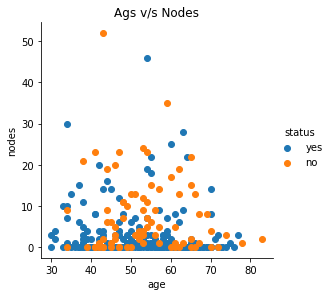

In [9]:
sns.FacetGrid(df,hue="status",height=4).map(plt.scatter,"age","nodes").add_legend()
plt.title("Ags v/s Nodes")
plt.show()

most of the patient having lymph node less than 10 within the age of 30 to 78 and 70% of them have survived.

###### Lesser the number of lymph nodes more likely that patient will survive.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


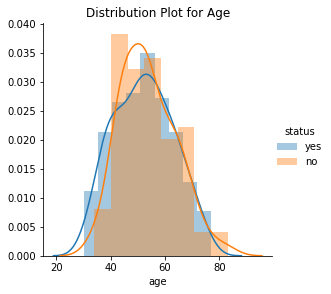

In [10]:
sns.FacetGrid(df,hue="status",height=4).map(sns.distplot,"age").add_legend()
plt.title("Distribution Plot for Age")
plt.show()

Distplot for age is mixup,outsites can't be make from it.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


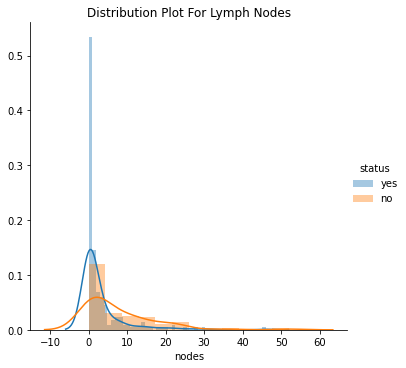

In [11]:

sns.FacetGrid(df, hue="status", height=5) \
    .map(sns.distplot, "nodes") \
    .add_legend()
plt.title("Distribution Plot For Lymph Nodes")
plt.show()

Plot for lymph node is also mixup but we can say that if the person is having nodes 0 the chances of the patient to live is more and as the nodes increases the chances of survival is less.

### PDF & CDF

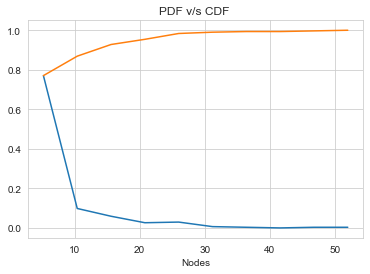

In [12]:
sns.set_style("whitegrid")
counts,bins=np.histogram(df['nodes'],bins=10,density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bins)
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
plt.title("PDF v/s CDF ")
plt.xlabel("Nodes")
plt.show()

Around  85% of data have lymph nodes less tn or equal to 10.

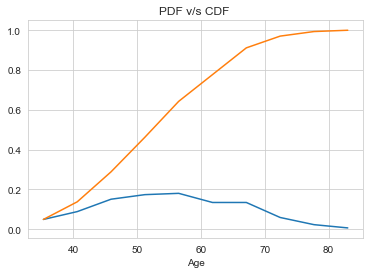

In [13]:
counts,bins=np.histogram(df['age'],bins=10,density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bins)
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
plt.title("PDF v/s CDF ")
plt.xlabel("Age")
plt.show()

75% of data having age or less than equal to 60 years.

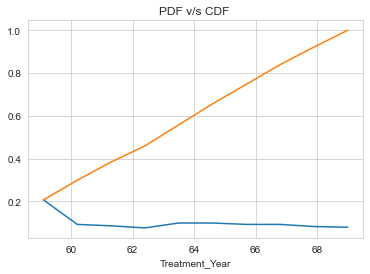

In [14]:
counts,bins=np.histogram(df['year'],bins=10,density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bins)
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
plt.title("PDF v/s CDF ")
plt.xlabel("Treatment_Year")
plt.show()

605 of data have done the surgery in the year 1964

### Box and Whiskers

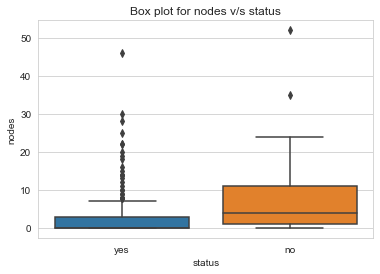

In [15]:
sns.boxplot(data=df,x="status",y="nodes")
plt.title("Box plot for nodes v/s status")
plt.show()

    it is observated that the less number of lymph nodes the more patient will survived.
    and the more number of nodes the patient will not survived

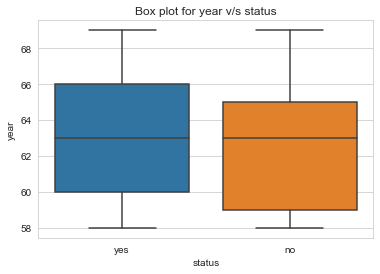

In [16]:
sns.boxplot(data=df,x="status",y="year")
plt.title("Box plot for year v/s status")
plt.show()

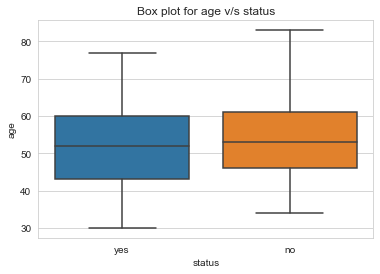

In [17]:
sns.boxplot(data=df,x="status",y="age")
plt.title("Box plot for age v/s status")
plt.show()


Patients who survived more than 5 years aged more than 45 to 60 years old

Patients who survived less than 5 years aged between 45 to 60+ years old

##### Violen Plot

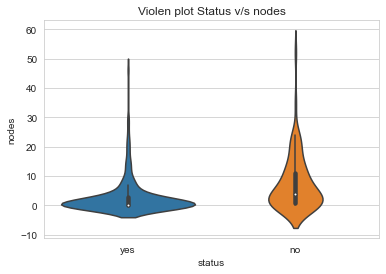

In [18]:
sns.violinplot(data=df,x="status",y="nodes")
plt.title("Violen plot Status v/s nodes")
plt.show()

the less number of lymph nodes the chances of survice after treatment is more.

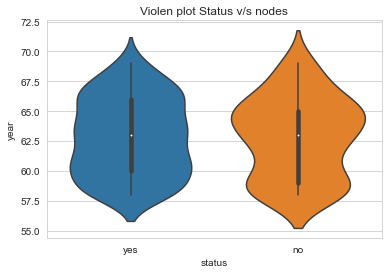

In [19]:
sns.violinplot(data=df,x="status",y="year")
plt.title("Violen plot Status v/s nodes")
plt.show()

 ##### Join plot

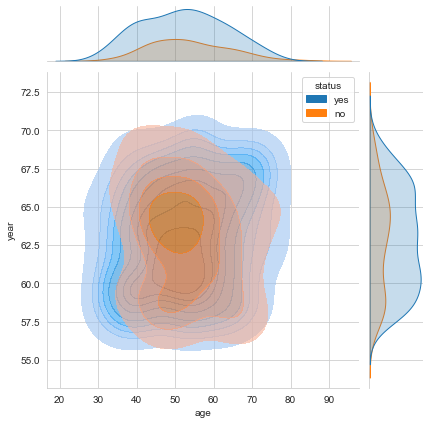

In [20]:
sns.jointplot(data=df,x="age",y="year",hue="status",kind="kde",fill=True,alpha=.6)
plt.show()

Most of the patients have undergone operation between the age 40 to 60 years old in the year 1958 to 1964

##### Pair Plot

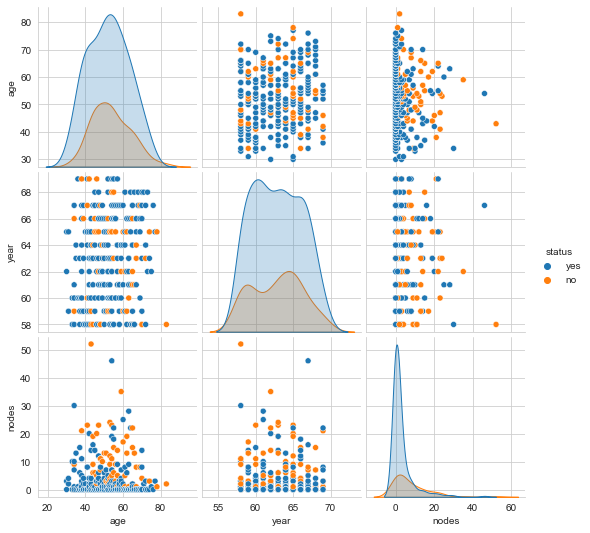

In [21]:
sns.pairplot(data=df,hue="status")
plt.show()

plot between node and age is helpfull rest other are overlapped

In [22]:
abc=df.corr()

In [23]:
abc

,age,year,nodes
age,1.000000,0.092623,-0.066548
year,0.092623,1.000000,-0.003277
nodes,-0.066548,-0.003277,1.000000


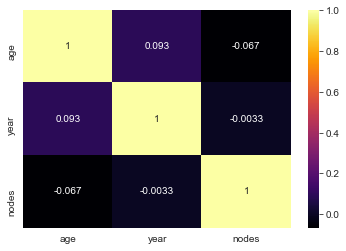

In [24]:
sns.heatmap(abc,annot=True,cmap="inferno")
plt.show()

the highest relation is between age and year that is 9.3%

and the lowest realation is between nodes and year that is 0.33%